<a href="https://colab.research.google.com/github/ag-odonnell/Python-code/blob/main/snippets/ocr/keras_ocr-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google: google colab keras_ocr install

In [ ]:
# google colab - need to install keras-ocr each session until placed in start-up environment - quiet option turns off many of the installation log messages
!pip install -q keras-ocr

     |████████████████████████████████| 42 kB 898 kB/s 
     |████████████████████████████████| 965 kB 17.2 MB/s 
     |████████████████████████████████| 9.5 MB 43.2 MB/s 
     |████████████████████████████████| 604 kB 63.7 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.143s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


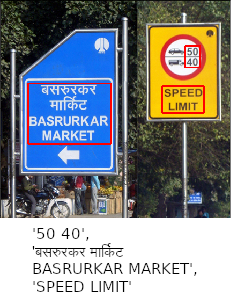

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("example3.png")
im

In [ ]:
images = [
    keras_ocr.tools.read(img) for img in ['example2.png',
                                          'example3.png'
    ]
]

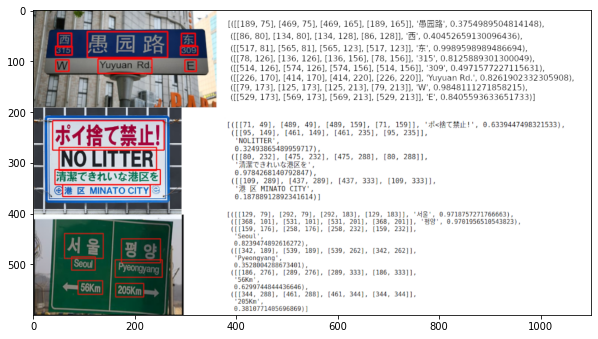

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(images[0])

In [ ]:
prediction_groups = pipeline.recognize(images)

8/8 [==============================] - 71s 8s/step


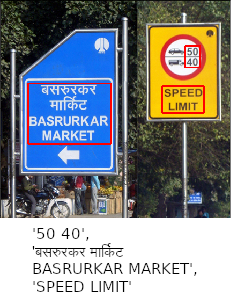

In [ ]:
im

In [ ]:
pipeline.recognize([images[1]])

1/1 [==============================] - 4s 4s/step


[[('50', array([[187.,  47.],
          [200.,  47.],
          [200.,  57.],
          [187.,  57.]], dtype=float32)), ('40', array([[187.,  57.],
          [200.,  57.],
          [200.,  66.],
          [187.,  66.]], dtype=float32)), ('er', array([[41., 84.],
          [98., 84.],
          [98., 96.],
          [41., 96.]], dtype=float32)), ('speed', array([[165.,  88.],
          [204.,  88.],
          [204.,  98.],
          [165.,  98.]], dtype=float32)), ('hilhc', array([[ 49.,  98.],
          [ 89.,  98.],
          [ 89., 112.],
          [ 49., 112.]], dtype=float32)), ('limit', array([[168., 101.],
          [201., 101.],
          [201., 111.],
          [168., 111.]], dtype=float32)), ('basrurkar', array([[ 29., 114.],
          [111., 114.],
          [111., 128.],
          [ 29., 128.]], dtype=float32)), ('market', array([[ 42., 129.],
          [ 97., 129.],
          [ 97., 142.],
          [ 42., 142.]], dtype=float32)), ('50', array([[ 36., 227.],
          [ 57

In [ ]:
results = pipeline.recognize([images[1]])

1/1 [==============================] - 4s 4s/step


In [ ]:
resultsDf = pd.DataFrame(results[0], columns=['text','bbox'])
resultsDf

,text,bbox
0,50,"[[187.0, 47.0], [200.0, 47.0], [200.0, 57.0], ..."
1,40,"[[187.0, 57.0], [200.0, 57.0], [200.0, 66.0], ..."
2,er,"[[41.0, 84.0], [98.0, 84.0], [98.0, 96.0], [41..."
3,speed,"[[165.0, 88.0], [204.0, 88.0], [204.0, 98.0], ..."
4,hilhc,"[[49.0, 98.0], [89.0, 98.0], [89.0, 112.0], [4..."
5,limit,"[[168.0, 101.0], [201.0, 101.0], [201.0, 111.0..."
6,basrurkar,"[[29.0, 114.0], [111.0, 114.0], [111.0, 128.0]..."
7,market,"[[42.0, 129.0], [97.0, 129.0], [97.0, 142.0], ..."
8,50,"[[36.0, 227.0], [57.0, 227.0], [57.0, 241.0], ..."
9,401,"[[61.0, 227.0], [87.0, 227.0], [87.0, 241.0], ..."


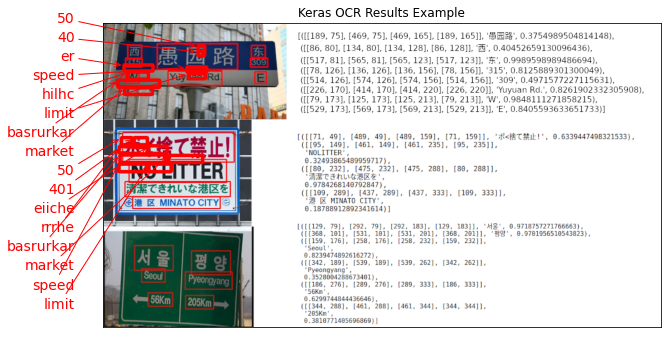

In [ ]:
#kera_ocr has a built in annotations tool
fig, ax = plt.subplots(figsize=(10,10)) #make the plot bigger
#keras_ocr.tools.drawAnnotations(plt.imread('example2.png'), results[0])
keras_ocr.tools.drawAnnotations(images[0], results[0], ax=ax)
ax.set_title('Keras OCR Results Example')
plt.show()

In [ ]:
#this is maintained for reference - it will need to be adjusted before it will work in this notebook
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)